# Machine Learning Assignment - part1:
## Dataset Assessment

## Introduction

Welcome to the preprocessing phase of the data analysis workflow. In this notebook, we will focus on the cleaning and assessment of the dataset to ensure its quality and reliability for downstream tasks such as modeling and visualization.

## Objectives
The preprocessing stage is crucial in any machine learning project, as it directly impacts the accuracy and robustness of the final outcomes. This notebook will:

1. Assess the dataset for potential issues such as missing values, duplicates, and inconsistencies.
2. Clean the data to address identified issues, including handling null values, standardizing formats, and correcting errors.
3. Document all steps taken to ensure transparency and reproducibility.

__Importing Libraries:__

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



### 1. Gathering data:

__Dataset:__

TG_T_CashValues_Rel.

__Type:__ __Excel__ file.

In [3]:
df= pd.read_excel('TG_T_CashValues_Rel.xlsx')

__Getting to know the dataframe:__

The dataset used in this analysis includes the following columns:

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gender</td>
      <td>The gender of the individual (e.g., Male, Female).</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the individual (in years).</td>
    </tr>
    <tr>
      <td>Dur</td>
      <td>Duration or time-related feature (context-dependent).</td>
    </tr>
    <tr>
      <td>PPV</td>
      <td>PPV value (continuous variable, the target for prediction).</td>
    </tr>
  </tbody>
</table>


__To see the shape of this dataframe:__

In [4]:
print("This dataframe has: ",df.shape[0], "records", df.shape[1], "columns")

This dataframe has:  5270 records 4 columns


### 2. Data Assessment:

Assessing the data according to data quality and tidiness metrics using the report below

### a. Completeness.

For visual Assessent:

In [5]:
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [6]:
df.tail()

,Gender,Age,Dur,PPV
5265,Female,78,2,1.925421
5266,Female,78,3,2.777638
5267,Female,79,1,1.000000
5268,Female,79,2,1.920897
5269,Female,80,1,1.000000


No null values appeared in both checks, let's try to see a random sample.

In [7]:
df.sample(5, random_state=42)

,Gender,Age,Dur,PPV
3686,Female,24,42,23.751965
8,Male,0,28,19.106189
1536,Male,34,30,19.302021
3538,Female,21,44,24.339920
5235,Female,73,2,1.942791


#### Inspecting the dataframe programmitically:

In [8]:
df.isnull().sum()

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64

there are no N/A values int his Dataframe.

### Validity:
__Misrepresented__ null values and __erroneous data types__.

In [9]:
df.dtypes

Gender     object
Age         int64
Dur         int64
PPV       float64
dtype: object

In [10]:
df.describe()

,Age,Dur,PPV
count,5270.000000,5270.000000,5270.000000
mean,31.294118,22.882353,14.858158
std,18.671548,13.793388,7.025862
min,0.000000,1.000000,1.000000
25%,16.000000,11.000000,9.374980
50%,30.000000,22.000000,15.703883
75%,45.000000,34.000000,20.953996
max,80.000000,50.000000,26.024118


Since __Age__ min: 0 and max: 80, it can be enhanced into __int16__,
same goes for __duration__.

as for __PPV__ its float64 which will be converted to __float16__.

for __Gender__ which can be converted into __categorical__.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB


__Memory usage__ is: __164.8+ KB__

### C. Uniqueness

In [12]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


In [13]:
specific_duplicates = df[df.duplicated(subset=['Gender', 'Age', 'Dur'])]
print(specific_duplicates)


Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


There are no duplicates in this dataframe.

### d. Consistency

In [14]:
df.Gender.value_counts()

Gender
Male      2635
Female    2635
Name: count, dtype: int64

Gender column is consistent.

## 3. Data Cleaning

In [15]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [16]:
cleaned_df=df.copy()

In [17]:
cleaned_df['Age'] = df['Age'].astype('int16')
cleaned_df['Dur'] = df['Dur'].astype('int16')
cleaned_df['PPV'] = df['PPV'].astype('float16')
cleaned_df['Gender'] = df['Gender'].astype('category')

 __Verify the changes in data types__

In [18]:
cleaned_df.dtypes

Gender    category
Age          int16
Dur          int16
PPV        float16
dtype: object

We should convert __any categorical values to numerical__, because __most machine learning algorithms operate on numerical data__. They perform mathematical calculations to find patterns, and non-numeric data, like text or categories, cannot directly be used in these computations.

In [19]:
df.sample(3, random_state=42)

,Gender,Age,Dur,PPV
3686,1,24,42,23.751965
8,0,0,28,19.106189
1536,0,34,30,19.302021


To ensure the changes were made correctly:

This dataframe is clean, no need to perform any cleaning. The only change is for memory usage.

In [20]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  5270 non-null   category
 1   Age     5270 non-null   int16   
 2   Dur     5270 non-null   int16   
 3   PPV     5270 non-null   float16 
dtypes: category(1), float16(1), int16(2)
memory usage: 36.3 KB


we notice that the memory usage dropped down from __164.8+ Kb__ to __36.3 KB__.

## Visualizations

In [26]:
gender_counts=df['Gender'].value_counts()

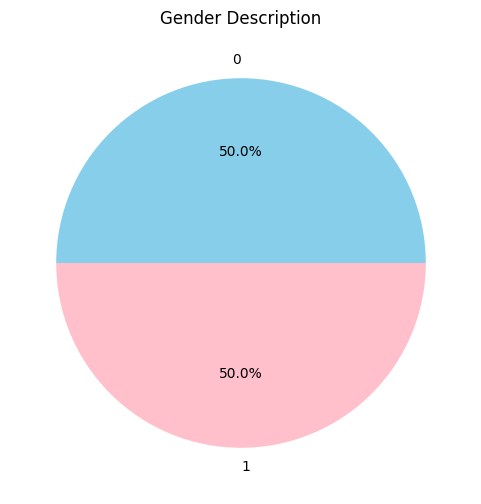

In [27]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%' , colors=['skyblue','pink'])
plt.title('Gender Description')
plt.show()

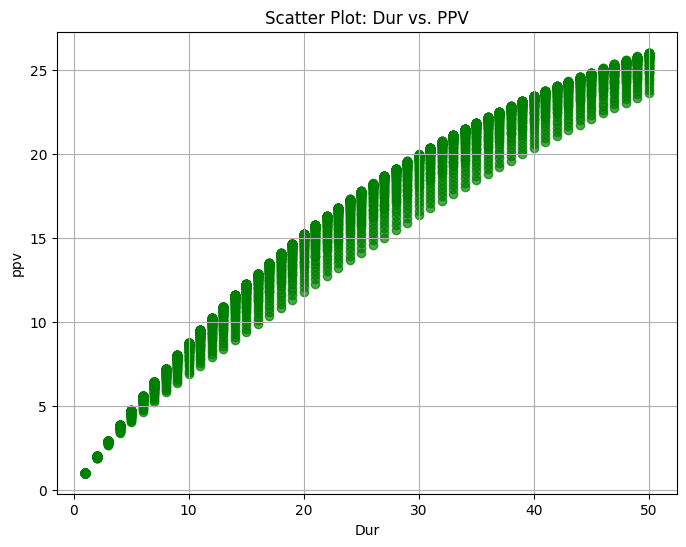

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df['Dur'], df['PPV'], alpha=0.7, color='green')
plt.title('Scatter Plot: Dur vs. PPV')
plt.xlabel('Dur')
plt.ylabel('ppv')
plt.grid(True)
plt.show()

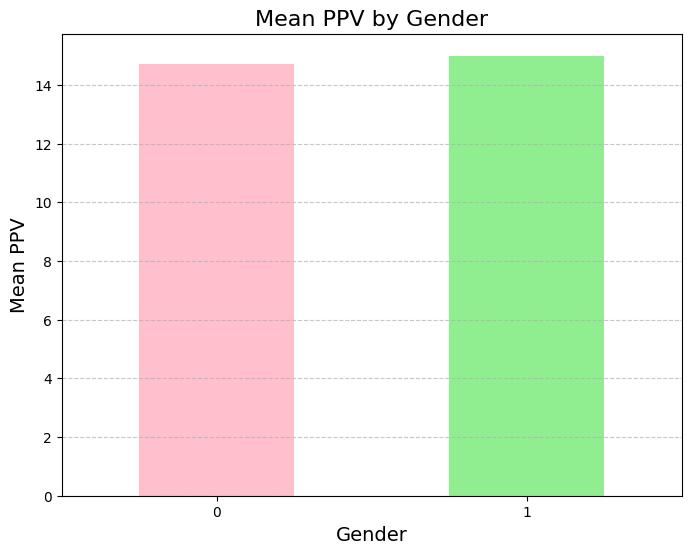

In [30]:
gender_mean_ppv = df.groupby('Gender')['PPV'].mean()
plt.figure(figsize=(8,6))
gender_mean_ppv.plot(kind='bar' , color=['pink', 'lightgreen'])
plt.title('Mean PPV by Gender' , fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean PPV', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# Save the DataFrames to CSV files
cleaned_df.to_csv('cleaned_df.csv', index=False)